In [1]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install ohmeow-blurr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=80d37eb4be8c6fc3fe6503a33a3e31d7e53da44fcd8cea9533297253636ef645
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=99d75fca6e09d1e2af6d204571412e1e636ad8abd981d11a33cd3ecb49f456b0
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e84

In [3]:
!pip install bert-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 KB 6.7 MB/s eta 0:00:00


In [4]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=512238ed546e2ec07ee2ae3f975d099dc40af952329d04b023fb2377442d5484
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [5]:
!wget -nc https://raw.githubusercontent.com/sovikc/arxiv-text-summarization/main/arxiv_dataset.csv

--2023-01-13 06:39:10--  https://raw.githubusercontent.com/sovikc/arxiv-text-summarization/main/arxiv_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65649 (64K) [text/plain]
Saving to: ‘arxiv_dataset.csv’

arxiv_dataset.csv   100%[===================>]  64.11K  --.-KB/s    in 0.001s  

2023-01-13 06:39:10 (43.6 MB/s) - ‘arxiv_dataset.csv’ saved [65649/65649]



In [6]:
import numpy as np
import pandas as pd

import torch
from sklearn.model_selection import train_test_split

import datasets
from fastai.text.all import *
from transformers import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

import nltk
nltk.download('punkt', quiet=True)

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


True

In [7]:
df = pd.read_csv('arxiv_dataset.csv')

In [8]:
df.head()

,Title,Text,Summary
0,State of the Art in Dense Monocular Non-Rigid 3D Reconstruction,"3D reconstruction of deformable (or non-rigid) scenes from a set of monocular 2D image observations is a long-standing and actively researched area of computer vision and graphics. It is an ill-posed inverse problem, since--without additional prior assumptions--it permits infinitely many solutions leading to accurate projection to the input 2D images. Non-rigid reconstruction is a foundational building block for downstream applications like robotics, AR/VR, or visual content creation. The key advantage of using monocular cameras is their omnipresence and availability to the end users as we...",3D reconstruction of deformable (or non-rigid) scenes from a set of monocular 2D image observations is a long-standing and actively researched area of computer vision and graphics.
1,Deep Generative Models on 3D Representations: A Survey,"Generative models, as an important family of statistical modeling, target learning the observed data distribution via generating new instances. Along with the rise of neural networks, deep generative models, such as variational autoencoders (VAEs) and generative adversarial network (GANs), have made tremendous progress in 2D image synthesis. Recently, researchers switch their attentions from the 2D space to the 3D space considering that 3D data better aligns with our physical world and hence enjoys great potential in practice. However, unlike a 2D image, which owns an efficient representat...","Generative models, as an important family of statistical modeling, target learning the observed data distribution via generating new instances.we make a thorough review of the development of 3D generation, including 3D shape generation and 3D-aware image synthesis, from the perspectives of both algorithms and more importantly representations"
2,Revisiting the ACVI Method for Constrained Variational Inequalities,"ACVI is a recently proposed first-order method for solving variational inequalities (VIs) with general constraints. Yang et al. (2022) showed that the gap function of the last iterate decreases at a rate of (1K√) when the operator is L-Lipschitz, monotone, and at least one constraint is active. In this work, we show that the same guarantee holds when only assuming that the operator is monotone. To our knowledge, this is the first analytically derived last-iterate convergence rate for general monotone VIs, and overall the only one that does not rely on the assumption that the operator is L-...","ACVI is a recently proposed first-order method for solving variational inequalities (VIs) with general constraints.Yang et al. (2022) showed that the gap function of the last iterate decreases at a rate of (1K√) when the operator is L-Lipschitz, monotone, and at least one constraint is active"
3,All the Feels: A dexterous hand with large area sensing,"High cost and lack of reliability has precluded the widespread adoption of dexterous hands in robotics. Furthermore, the lack of a viable tactile sensor capable of sensing over the entire area of the hand impedes the rich, low-level feedback that would improve learning of dexterous manipulation skills. This paper introduces an inexpensive, modular, robust, and scalable platform - the DManus- aimed at resolving these challenges while satisfying the large-scale data collection capabilities demanded by deep robot learning paradigms. Studies on human manipulation point to the criticality of lo...","High cost and lack of reliability has precluded the widespread adoption of dexterous hands in robotics.This paper introduces an inexpensive, modular, robust, and scalable platform - the DManus- aimed at resolving these challenges while satisfying the large-scale data collection capabilities demanded by deep robot learning paradigms"
4,Learning to predict arbitrary quantum processes,"We present an efficient machine learning (ML) algorithm for predicting any unknown quantum process over n qubit

In [9]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files='arxiv_dataset.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-906db70a325c53b8/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['Title', 'Text', 'Summary'],
        num_rows: 40
    })
})

In [11]:
split = raw_dataset['train'].train_test_split(test_size=0.2, seed=42)

In [12]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [13]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization'); text_gen_kwargs

{'max_length': 142,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'typical_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False,
 'exponential_decay_length_penalty': None,
 'suppress_tokens': None,
 'begin_suppress_tokens': None}

In [14]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('Text'), get_y=ColReader('Summary'), splitter=RandomSplitter())

In [15]:
dls = dblock.dataloaders(df, bs=2)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [16]:
len(dls.train.items), len(dls.valid.items)

(32, 8)

In [17]:
b = dls.one_batch()
len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 256]), torch.Size([2, 115]))

In [18]:
dls.show_batch(dataloaders=dls, max_n=2)

,text,target
0,"<s> The ability to identify influential training examples enables us to debug training data and explain model behavior. Existing techniques to do so are based on the flow of training data influence through the model parameters. For large models in NLP applications, it is often computationally infeasible to study this flow through all model parameters, therefore techniques usually pick the last layer of weights. However, we observe that since the activation connected to the last layer of weights contains ""shared logic"", the data influenced calculated via the last layer weights prone to a ``cancellation effect'', where the data influence of different examples have large magnitude that contradicts each other. The cancellation effect lowers the discriminative power of the influence score, and deleting influential examples according to this measure often does not change the model's behavior by much. To mitigate this, we propose a technique called TracIn-WE that modifies a method called TracIn to operate on the word embedding layer instead of the last layer, where the cancellation effect is less severe. One potential concern is that influence based on the word embedding layer may not encode sufficient high level information. However, we find that gradients (unlike embeddings) do not suffer from this, possibly because they chain through higher layers</s>","The ability to identify influential training examples enables us to debug training data and explain model behavior. For large models in NLP applications, it is often computationally infeasible to study this flow through all model parameters, therefore techniques usually pick the last layer of weights.we propose a technique called TracIn-WE that modifies a method called TracIn to operate on the word embedding layer instead of the last layer, where the cancellation effect is less severe."
1,"<s> Finding unified complexity measures and algorithms for sample-efficient learning is a central topic of research in reinforcement learning (RL). The Decision-Estimation Coefficient (DEC) is recently proposed by Foster et al. (2021) as a necessary and sufficient complexity measure for sample-efficient no-regret RL. This paper makes progress towards a unified theory for RL with the DEC framework. First, we propose two new DEC-type complexity measures: Explorative DEC (EDEC), and Reward-Free DEC (RFDEC). We show that they are necessary and sufficient for sample-efficient PAC learning and reward-free learning, thereby extending the original DEC which only captures no-regret learning. Next, we design new unified sample-efficient algorithms for all three learning goals. Our algorithms instantiate variants of the Estimation-To-Decisions (E2D) meta-algorithm with a strong and general model estimation subroutine. Even in the no-regret setting, our algorithm E2D-TA improves upon the algorithms of Foster et al. (2021) which require either bounding a variant of the DEC which may be prohibitively large, or designing problem-specific estimation subroutines. As applications, we recover existing</s>","Finding unified complexity measures and algorithms for sample-efficient learning is a central topic of research in reinforcement learning (RL).This paper makes progress towards a unified theory for RL with the DEC framework. First, we propose two new DEC-type complexity measures: Explorative DEC (EDEC), and Reward-Free DEC (RFDEC).Next, we design new unified sample-efficient algorithms for all three learning goals. Finally, as a connection, we re-analyze two existing optimistic model-based algorithms based on Posterior Sampling or Maximum Likelihood Estimation"


In [19]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [20]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your lab

SuggestedLRs(valley=0.00015848931798245758)

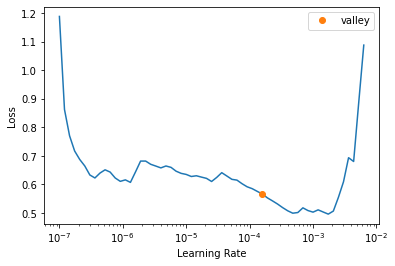

In [21]:
learn.lr_find()

In [22]:
b = dls.one_batch()
preds = learn.model(b[0])
len(preds),preds[0], preds[1].shape

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


(3,
 tensor(1.1716, device='cuda:0', grad_fn=<NllLossBackward0>),
 torch.Size([2, 115, 50264]))

In [23]:
learn.fit_one_cycle(1, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,0.634600,0.574068,0.543943,0.449494,0.503854,0.908327,0.918418,0.913065,01:03


Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

In [24]:
learn.show_results(learner=learn, max_n=2)

,text,target,prediction
0,"Generative models, as an important family of statistical modeling, target learning the observed data distribution via generating new instances. Along with the rise of neural networks, deep generative models, such as variational autoencoders (VAEs) and generative adversarial network (GANs), have made tremendous progress in 2D image synthesis. Recently, researchers switch their attentions from the 2D space to the 3D space considering that 3D data better aligns with our physical world and hence enjoys great potential in practice. However, unlike a 2D image, which owns an efficient representation (i.e., pixel grid) by nature, representing 3D data could face far more challenges. Concretely, we would expect an ideal 3D representation to be capable enough to model shapes and appearances in details, and to be highly efficient so as to model high-resolution data with fast speed and low memory cost. However, existing 3D representations, such as point clouds, meshes, and recent neural fields, usually fail to meet the above requirements simultaneously. In this survey, we make a thorough review of the development of 3D generation, including 3D shape generation and 3D-aware image synthesis, from the perspectives of both algorithms and more importantly representations. We","Generative models, as an important family of statistical modeling, target learning the observed data distribution via generating new instances.we make a thorough review of the development of 3D generation, including 3D shape generation and 3D-aware image synthesis, from the perspectives of both algorithms and more importantly representations","[Researchers switch their attentions from the 2D space to the 3D space considering that 3D data better aligns with our physical world and hence enjoys great potential in practice. Unlike a 2D image, which owns an efficient representation (i.e., pixel grid) by nature, representing 3DData could face far more challenges., Embedding knowledge graphs (KGs) for multi-hop logical reasoning is a challenging problem due to massive and complicated structures in many KGs. We propose a novel probabilistic embedding model, namely Gamma Embeddings (GammaE), for encoding entities and queries. Experimental results show that GammaE significantly outperforms state-of-the-art models on public benchmarks.]"
